# Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Regression

In [2]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data=np.c_[ data.data, data.target ],  
                  columns=np.append(data.feature_names, 'target'))
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
X = df.drop('target', axis=1)
y = df['target']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train / Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
# Scale the data

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [26]:
# Define the NN model

model = Sequential([
    Input(X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear'),
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mae', 'mse'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [7]:
results = model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50


18/18 [==============================] - 0s 1ms/step - loss: 27116.8691 - mae: 144.9494 - mse: 27116.8691
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 20225.2246 - mae: 119.6966 - mse: 20225.2246
Epoch 3/50
18/18 [==============================] - 0s 1ms/step - loss: 8370.3262 - mae: 70.0969 - mse: 8370.3262
Epoch 4/50
18/18 [==============================] - 0s 1ms/step - loss: 5176.7427 - mae: 61.5066 - mse: 5176.7427
Epoch 5/50
18/18 [==============================] - 0s 1ms/step - loss: 4745.1421 - mae: 57.9260 - mse: 4745.1421
Epoch 6/50
18/18 [==============================] - 0s 1ms/step - loss: 4683.9526 - mae: 57.9376 - mse: 4683.9526
Epoch 7/50
18/18 [==============================] - 0s 1ms/step - loss: 4404.7139 - mae: 56.1336 - mse: 4404.7139
Epoch 8/50
18/18 [==============================] - 0s 1ms/step - loss: 4311.0386 - mae: 55.3440 - mse: 4311.0386
Epoch 9/50
18/18 [==============================] - 0s 2ms/step - loss: 4173.8584 - mae: 54.8

In [8]:
# The `results` object contains the loss and metrics values for the training data

results.history.keys()

dict_keys(['loss', 'mae', 'mse'])

In [9]:
# Last 5 values of MAE on the training data
results.history['mae'][-5:]

[43.06529998779297,
 43.76976776123047,
 43.478755950927734,
 43.79795837402344,
 43.2203254699707]

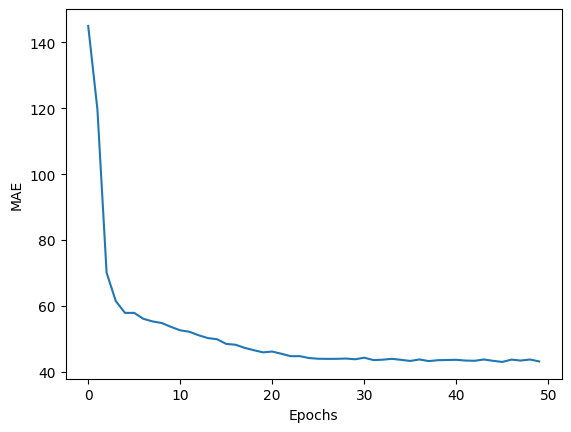

In [10]:
# Visualize the training MAE over the epochs

plt.plot(results.history['mae'])
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [11]:
# Evaluates on the given metrics (when we compiled the model) and the loss function

train_loss, train_mae, train_mse = model.evaluate(X_train, y_train)
val_loss, val_mae, val_mse = model.evaluate(X_val, y_val)

3/3 [==============================] - 0s 2ms/step - loss: 2795.5393 - mae: 44.0796 - mse: 2795.5393


In [12]:
print(f'Train MAE: {train_mae:.2f}')
print(f'Validation MAE: {val_mae:.2f}')
print()
print(f'Train MSE: {train_mse:.2f}')
print(f'Validation MSE: {val_mse:.2f}')

Train MAE: 43.58
Validation MAE: 44.08

Train MSE: 2935.00
Validation MSE: 2795.54


# Classification

In [13]:
from tensorflow.keras.metrics import Precision, Recall

In [14]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data=np.c_[ data.data, data.target ],  
                  columns=np.append(data.feature_names, 'target'))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [15]:
X = df.drop('target', axis=1)
y = df['target']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train / Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
# Scale the data

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## 1 Sigmoid Neuron

In [17]:
# Define the NN model

model = Sequential([
    Input(X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=[Precision(), Recall()])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                496       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [19]:
results = model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50


23/23 [==============================] - 1s 1ms/step - loss: 0.5392 - precision: 0.8679 - recall: 0.7965
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2754 - precision: 0.9177 - recall: 0.9177
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1789 - precision: 0.9432 - recall: 0.9351
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1668 - precision: 0.9328 - recall: 0.9610
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1078 - precision: 0.9534 - recall: 0.9740
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1094 - precision: 0.9609 - recall: 0.9567
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1373 - precision: 0.9372 - recall: 0.9697
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1369 - precision: 0.9600 - recall: 0.9351
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1181 - pr

In [20]:
# Returns the probabilities given by the sigmoid function

y_val_probs_1 = model.predict(X_val)
y_val_probs_1[:5]

3/3 [==============================] - 0s 2ms/step


array([[1.7029109e-06],
       [9.9982071e-01],
       [9.9996072e-01],
       [1.0000000e+00],
       [1.1408901e-01]], dtype=float32)

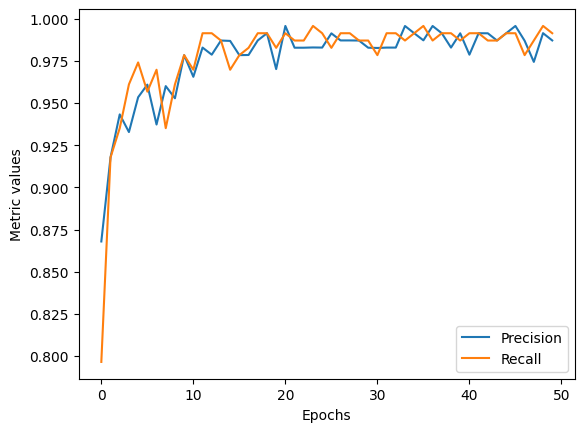

In [22]:
# Visualize the training metrics over the epochs

plt.plot(results.history['precision'], label='Precision')
plt.plot(results.history['recall'], label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Metric values')
plt.legend()
plt.show()

In [23]:
# Evaluates on the given metrics (when we compiled the model) and the loss function

train_loss, train_prec, train_rec = model.evaluate(X_train, y_train)
val_loss, val_prec, val_rec = model.evaluate(X_val, y_val)

3/3 [==============================] - 0s 2ms/step - loss: 0.1657 - precision: 0.9649 - recall: 1.0000


In [24]:
print(f'Train Precision: {train_prec:.2f}')
print(f'Validation Precision: {val_prec:.2f}')
print()
print(f'Train Recall: {train_rec:.2f}')
print(f'Validation Recall: {val_rec:.2f}')

Train Precision: 0.97
Validation Precision: 0.96

Train Recall: 1.00
Validation Recall: 1.00
